In [34]:
import numpy as np
import matplotlib.pyplot as plt
import random
import os

In [2]:
%%capture
!unzip Knapsack-datasetsZIP
!rm -r __MACOSX
!rm -r sample_data
!rm -r Knapsack-datasetsZIP

#**FUNCIONES**#

LECTURA DE ARCHIVOS DE DATOS

In [3]:
def leer_datos(carpeta_datos):
    carpeta = carpeta_datos
    
    # Leer capacity.txt
    capacidad_file = os.path.join(carpeta, "capacity.txt")
    capacidad = np.loadtxt(capacidad_file, dtype=int).tolist()
    
    # Leer optimalSolution.txt
    soloptima_file = os.path.join(carpeta, "optimalSolution.txt")
    soloptima = np.loadtxt(soloptima_file, dtype=int).tolist()
    
    # Leer profits.txt
    precios_file = os.path.join(carpeta, "profits.txt")
    precios = np.loadtxt(precios_file, dtype=int).tolist()
    
    # Leer weights.txt
    pesos_file = os.path.join(carpeta, "weights.txt")
    pesos = np.loadtxt(pesos_file, dtype=int).tolist()
    
    return pesos, precios, capacidad, soloptima


EVALUACIÓN DE POBLACIÓN POR INDIVIDUOS

In [4]:
def evaluarSolucion(solucion, precios, pesos, pesoMax):
    precio = 0
    peso = 0
    for i in range(len(solucion)):
        precio += precios[i]*solucion[i]
        peso += pesos[i]*solucion[i]

    if peso > pesoMax:
        return 0
    else:
        return precio

APLICACIÓN DE OPERADORES GENÉTICOS: Selección, cruce y mutación

In [5]:
def aplicarOperadoresGeneticos(poblacion, k, cProb, mProb, tipoCruce, tipoMutacion):
    padres = []
    print(len(poblacion))
    print('POBLACION INICIAL')
    print(poblacion)


    #Seleccionar padres mediante torneo tamaño k
    print ('                    ')
    print ('                    ')
    print ('                    ')
    print('SELECCIÓN PADRES MEDIANTE TORNEO')
    print ('                    ')

    while len(padres) < len(poblacion):           #Queremos conseguir el mismo número
        selecAleatoria = []       
        i = 0
        
        while i < k:    #Selección de k números aleatorios
            j = random.randint(0, len(poblacion) - 1)   #Número aleatorio para acceder a la posición de poblacion
            #print('J es igual a '+str(j))
            #EN EL PODIUM PUEDE TENER EL MISMO INDIVIDUO
            #if poblacion[j] not in selecAleatoria:      # Comprueba que dicho elemento no esté en la selección Aleatoria
            selecAleatoria.append(poblacion[j])       
                #print('Poblacion[j]='+str(poblacion[j]))
            i += 1
        selecAleatoria.sort(key=lambda x: x[1], reverse=True) #Ordena de mayor a menor el segundo elemento de selección Aleatoria(valor)
        padres.append(selecAleatoria[0])
        #print('Ordenacion... '+str(selecAleatoria))
        #print('selecAleatoria:', selecAleatoria)
        #print('padres:', padres)
        
                #EN ESTA PRÁCTICA NO SE CONTROLA EL INCESTO
                #if len(padres) % 2 != 0:                        #Las parejas no pueden ser el mismo individuo  
                    # if selecAleatoria[0] == padres[-1]:         #El mejor individuo = ultimo de padres -> NADA
                    #   print('LA PAREJA NO PUEDE SER EL MISMO INDIVIDUO'+str(selecAleatoria[0])+str(padres[-1]))
                    #   pass
                    # else: 
                    #   padres.append(selecAleatoria[0])
                #else:
                    #padres.append(selecAleatoria[0])
    print ('                    ')            
    print('Población tras la selección:')
    print(padres)

    print ('                    ')
    print ('                    ')
    print ('                    ')
    print('CRUCE DE PAREJAS')
    print ('                    ')

    #CRUZAR padres con probabilidad cProb
    # #if random.random() <= cProb:
    

    #EN UN SOLO PUNTO
    if(tipoCruce == 0):
      print('CRUCE EN UN SOLO PUNTO')
      for i in range(0, len(padres), 2):                      #Desde 0 hasta lenpadres de 2en2       
        if random.random() <= cProb:  #Probabilidad de que se realice el cruce y se renueve la poblacion
          if i+1 < len(padres):    
            puntoCruce = random.randint(0, len(padres[i][0])-1)   #Punto aleatorio donde se realiza el cruce
            print('Punto cruce: '+str(puntoCruce))                                    
            print('Padre1 -> '+str(padres[i][0]))             
            print('Padre2 -> '+str(padres[i+1][0]))       
            hijo1 = padres[i][0][:puntoCruce] + padres[i+1][0][puntoCruce:]       #Cruce hijo 1
            print('Hijo1 -> '+str(hijo1))
            hijo2 = padres[i+1][0][:puntoCruce] + padres[i][0][puntoCruce:]       #Cruce hijo 2
            print('Hijo2 -> '+str(hijo2))
            print ('--------------')
            poblacion[i] = [hijo1]                            #Renovacion de poblacion
            poblacion[i+1] = [hijo2]                          #Renovacion de poblacion                
          else:           #Si la población es impar el ultimo individuo se mantiene igual

            poblacion[i] = [padres[i][0],]  #La población debe estar sin evaluar
        else:        #Probabilidad de que no se realice el cruce 
          if i+1 < len(padres):   #NO se renueva la población, se mantiene
            poblacion[i] = [padres[i][0],]  #
            poblacion[i+1] = [padres[i+1][0],]
          else:
            poblacion[i] = [padres[i][0],]
    
    #EN N PUNTOS
    elif(tipoCruce == 1):
      print('CRUCE EN N PUNTOS')
      for i in range(0, len(padres),2):
        if random.random() <=cProb:
          if i+1 < len(padres):
            puntosCruce=[] 
            while len(puntosCruce) < 3:
              nrandom = random.randint(0, len(padres[i][0])-1)
              if nrandom not in puntosCruce:
                puntosCruce.append(nrandom)   #Punto aleatorio donde se realiza el cruce
            puntosCruce.sort(reverse=False)
            print(puntosCruce)
            print('Padre1 -> '+str(padres[i][0]))             
            print('Padre2 -> '+str(padres[i+1][0]))  
            hijo1=padres[i][0][:puntosCruce[0]] + padres[i+1][0][puntosCruce[0]:puntosCruce[1]] + padres[i][0][puntosCruce[1]:puntosCruce[2]] + padres[i+1][0][puntosCruce[2]:]
            hijo2=padres[i+1][0][:puntosCruce[0]] + padres[i][0][puntosCruce[0]:puntosCruce[1]] + padres[i+1][0][puntosCruce[1]:puntosCruce[2]] + padres[i][0][puntosCruce[2]:]
            print('Hijo1  -> '+str(hijo1))
            print('Hijo2  -> '+str(hijo2))
            print ('--------------')
            poblacion[i] = [hijo1]                            
            poblacion[i+1] = [hijo2]
          
          else:                                         #Si la población es impar el ultimo individuo se mantiene igual
            poblacion[i] = [padres[i][0],]              #La población debe estar sin evaluar

    #EN CRUCE UNIFORME
    elif(tipoCruce == 2):
      print('CRUCE UNIFORME')
      for i in range(0, len(padres), 2):              #Desde 0 hasta lenpadres de 2en2       
        if i+1 < len(padres):   
          hijo1 = []
          hijo2 = []
          print('Padre1 -> '+str(padres[i][0]))             
          print('Padre2 -> '+str(padres[i+1][0]))
          for croms in range(0, len(padres[i][0])):   #Bucle for que pase por cada elemento de la mochila                             
  
            if random.random() <= cProb:              #Si se da la probabilidad de cruce     
              hijo1.append(padres[i+1][0][croms])     #El hijo 1 hereda del padre 2 el elemento N
              hijo2.append(padres[i][0][croms])       #El hijo 2 hereda del padre 1 el elemento N
  
            else:                                     #Si no se da la probabilidad de cruce
              hijo1.append(padres[i][0][croms])       #El hijo 1 hereda del padre 1 el elemento N
              hijo2.append(padres[i+1][0][croms])     #El hijo 2 hereda del padre 2 el elemento N
  
          print('Hijo1  -> '+str(hijo1))              #Imprimes y guardas los hijos una vez fuera del for
          print('Hijo2  -> '+str(hijo2))
          print ('--------------')
          poblacion[i] = [hijo1]                            
          poblacion[i+1] = [hijo2]                                     
  
        else:                                         #Si la población es impar el ultimo individuo se mantiene igual
          poblacion[i] = [padres[i][0],]              #La población debe estar sin evaluar
    
    
    else:
      print('Seleccione un tipo de cruce')

    print ('                    ')
    print ('                    ')
    print ('                    ')
    print('MUTACIÓN DE INDIVIDUOS')
    print ('                    ')

    #Mutar padres con probabilidad mProb
    #if random.random(0,1) <= mProb:

    #Mutación un único gen
    if (tipoMutacion==0):
      print('MUTACIÓN DE UN ÚNICO GEN')
      for i in range(len(poblacion)):
          if random.random() <= mProb:  # Probabilidad de mutar
              gen_mutado = random.randint(0, len(poblacion[i][0]) - 1)  # Seleccionar gen aleatorio para mutar
              print('Gen Mutado '+str(gen_mutado+1))
              #Modificacion del gen_mutado
              print('Individuo sin mutar -> '+str(poblacion[i]))
              if poblacion[i][0][gen_mutado] == 0:
                poblacion[i][0][gen_mutado] = 1
                print('Individuo mutado -> '+str(poblacion[i]))
              else:
                poblacion[i][0][gen_mutado] = 0 
                print('Individuo mutado -> '+str(poblacion[i]))
              print('-------------------------')


    elif(tipoMutacion==1):
      print('MUTACIÓN MÚLTIPLES GENES')
      for i in range(len(poblacion)):
        if random.random() <= mProb:
          genes_mutados=[]
          while len(genes_mutados) < 3:
            num_random = random.randint(0, len(poblacion[i][0]) - 1)
            if num_random not in genes_mutados:
              genes_mutados.append(num_random)
          genes_mutados.sort(reverse=False)
          print('Genes Mutado '+str(genes_mutados))
          print('Individuo sin mutar-> '+str(poblacion[i]))
          for j in genes_mutados:
            if poblacion[i][0][j] == 0:
              poblacion[i][0][j] = 1
            else:
              poblacion[i][0][j] = 0             
          print('Individuo mutado  ->  '+str(poblacion[i]))
          print('-------------------------')


    elif(tipoMutacion==2):
      print('MUTACIOON POR GEN CON PROBABILIDAD pm')
      for i in range(len(poblacion)):
        for gen in range(0, len(poblacion[i][0])):
          if random.random() <= mProb:
            print('Mutación Gen ', gen) 
            print('Gen sin mutar-> '+str(poblacion[i]))
            if poblacion[i][0][gen] == 0:
              poblacion[i][0][gen] = 1
            else:
              poblacion[i][0][gen] = 0
            print('Gen mutado   ->  '+str(poblacion[i]))
        print('-------------------------')


    print ('                    ')
    print ('                    ')
    print ('                    ')
    print('MEDIDA DE LA POBLACION FINAL '+str(len(poblacion)))
    print('LA POBLACION FINAL SIN EVALUAR')
    print(poblacion)
    return poblacion #Devolver la nueva poblacion (sin evaluar)

#**EJECUCIÓN SIMPLE**   (varias generaciones)#

26
POBLACION INICIAL
[[[1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1], 12768308], [[1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1], 12857990], [[1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1], 11612534], [[0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1], 13073137], [[1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1], 12987907], [[1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1], 12768843], [[1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0], 12747010], [[1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0], 12942146], [[0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1], 12007406], [[1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], 13192870], [[1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0], 12661974], [[0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 

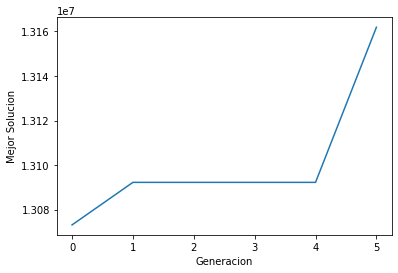

In [18]:
import random
import numpy as np


def main():
    datos = leer_datos('Knapsack-datasets/24')
    pesos = datos[0]
    precios = datos[1]
    pesoMax = datos[2] #Peso máximo que se puede poner en la mochila
    solOptima=datos[3]
    mejoresSoluciones=[]
    nSoluciones = 26 #Tamaño de la poblacion
    maxGeneraciones = 6 #Numero de generaciones
    k = 3 #Tamaño torneo selector de padres
    cProb = 0.7 #Probabilidad de cruce
    mProb = 0.1 #Probabilidad de mutacion
    suma = 0 #Variable para generar la media de las generaciones
    l=len(pesos)
    ##Creamos n soluciones aleatorias que sean válidas
    poblacion = []
    for i in range(nSoluciones):
        objetos = list(range(l))
        solucion = []
        peso = 0
        while peso < pesoMax:
            objeto = objetos[random.randint(0, len(objetos) - 1)]
            peso += pesos[objeto]
            if peso <= pesoMax:
                solucion.append(objeto)
                objetos.remove(objeto)

        s = []
        for i in range(l):
            s.append(0)
        for i in solucion:
            s[i] = 1
        poblacion.append([s,evaluarSolucion(s,precios,pesos,pesoMax)])

    it=0
    while it < maxGeneraciones:
        nSoluciones = aplicarOperadoresGeneticos(poblacion,k,cProb,mProb,0,0)
        #Modelo generacional
        poblacion = []
        for solucion in nSoluciones:
            poblacion.append([solucion[0],evaluarSolucion(solucion[0],precios,pesos,pesoMax)])
        it+=1
        print('SOLUCIÓN MEJOR OBTENIDA DEL ALGORITMO: ')
        poblacion.sort(key=lambda x: x[1], reverse=True) #Ordena de mayor a menor el segundo elemento de poblacion(valor)
        print(poblacion[0])
        mejoresSoluciones.append(poblacion[0][1])
        print(mejoresSoluciones)

        suma = suma + poblacion[0][1]

    print('POBLACIÓN FINAL EVALUADA')
    print(poblacion)

    print ('                    ')
    print ('                    ')
    print ('                    ')
    print('SOLUCIÓN MEJOR OBTENIDA DEL ALGORITMO: ')
    poblacion.sort(key=lambda x: x[1], reverse=True) #Ordena de mayor a menor el segundo elemento de poblacion(valor)
    print(poblacion[0])
    print('SOLUCIÓN ÓPTIMA REAL')
    print(solOptima, evaluarSolucion(solOptima, precios, pesos, pesoMax))

    print('Media de valor de mejores soluciones obtenidas')
    print(suma/(maxGeneraciones))

    import matplotlib.pyplot as plt

    plt.plot(range(maxGeneraciones), mejoresSoluciones)
    plt.xlabel('Generacion')
    plt.ylabel('Mejor Solucion')
    plt.show()


if __name__ == "__main__":
    main()


#**EJECUCIÓN MÚLTIPLE (varias ejecuciones)**#

26
POBLACION INICIAL
[[[0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], 11297180], [[0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0], 12405386], [[0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0], 11195263], [[0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0], 11941291], [[1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1], 11916661], [[0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0], 12175073], [[0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1], 12795539], [[0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1], 12395272], [[0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1], 12848222], [[0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], 11201377], [[1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1], 12100676], [[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 

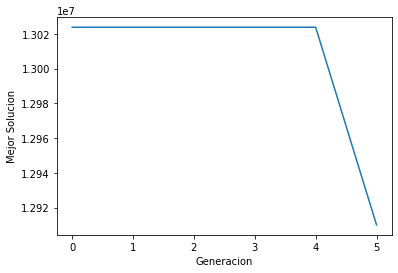

26
POBLACION INICIAL
[[[0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0], 12099813], [[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0], 12319575], [[1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1], 13045129], [[1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1], 12444208], [[0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0], 12335264], [[0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0], 11602234], [[1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1], 12081943], [[1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1], 12163420], [[0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0], 11773780], [[0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], 12941136], [[1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1], 12759205], [[0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 

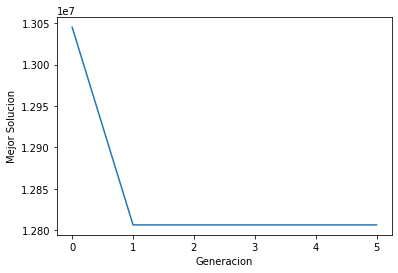

26
POBLACION INICIAL
[[[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0], 11941820], [[1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0], 13138108], [[0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1], 12197842], [[1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0], 12703741], [[1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0], 12135878], [[0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0], 12054512], [[0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1], 11073828], [[1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0], 12098687], [[1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1], 12850864], [[1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1], 12216600], [[1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0], 12536663], [[0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 

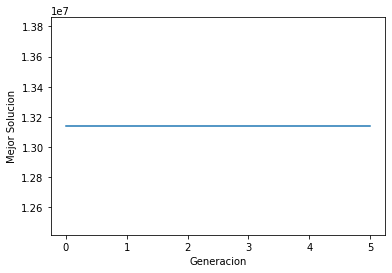

26
POBLACION INICIAL
[[[1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0], 12468441], [[0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0], 12364802], [[0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0], 11948963], [[1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1], 13093361], [[1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1], 12385127], [[1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0], 12505921], [[1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0], 12293933], [[1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0], 12443967], [[0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0], 12898760], [[0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1], 13131588], [[1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1], 12481038], [[0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 

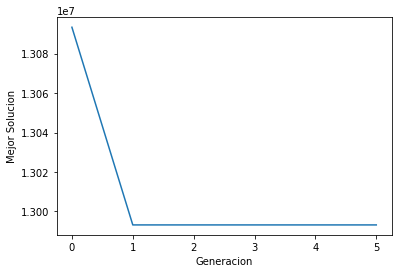

26
POBLACION INICIAL
[[[1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0], 12275738], [[0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0], 12032426], [[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0], 12323173], [[0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0], 12815811], [[1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1], 11733697], [[0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1], 12888613], [[0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1], 12609920], [[0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0], 13076355], [[1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0], 12136542], [[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1], 11417307], [[0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], 11845505], [[1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 

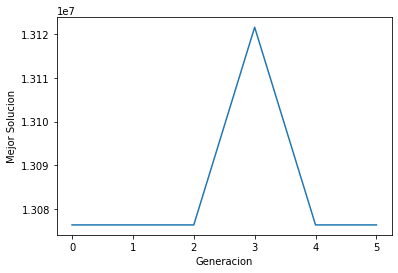

26
POBLACION INICIAL
[[[1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0], 12005198], [[1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1], 12785925], [[0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0], 11713492], [[1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0], 12948988], [[0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1], 12763432], [[1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0], 11222655], [[1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1], 11936878], [[0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1], 12298695], [[0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1], 11559460], [[1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1], 12124313], [[1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1], 12017033], [[1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 

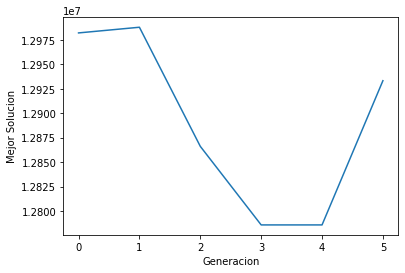

26
POBLACION INICIAL
[[[0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0], 12529425], [[1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1], 12759677], [[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0], 11479230], [[1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1], 12207971], [[1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0], 11941748], [[1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1], 11400730], [[1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0], 12553669], [[1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1], 12257853], [[1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1], 11907824], [[0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0], 12161511], [[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0], 12295242], [[0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 

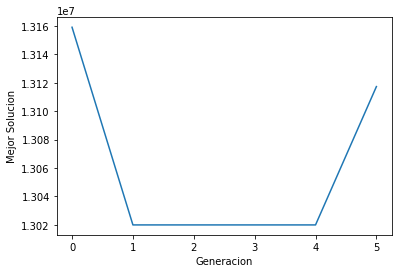

26
POBLACION INICIAL
[[[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1], 12583431], [[0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0], 12770928], [[0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0], 12697650], [[1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0], 12238111], [[1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0], 12636518], [[0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0], 11998330], [[0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1], 13254964], [[1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0], 12538668], [[0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0], 12100184], [[1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0], 12839045], [[0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1], 11367612], [[1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 

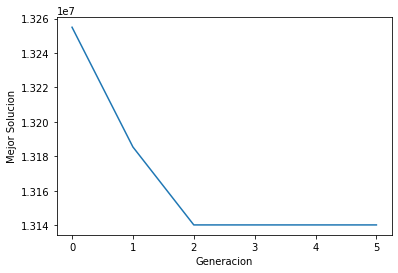

26
POBLACION INICIAL
[[[0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1], 12538496], [[0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1], 12577213], [[1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1], 12300056], [[1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1], 12417069], [[0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0], 12020054], [[1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1], 12828134], [[1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0], 11428549], [[0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0], 12947683], [[1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0], 11790472], [[0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1], 12836909], [[1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1], 13197748], [[1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 

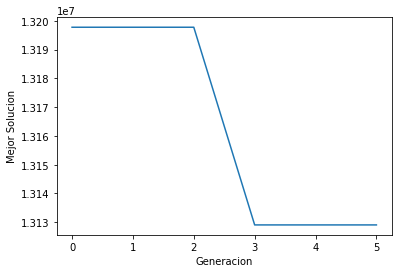

26
POBLACION INICIAL
[[[1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1], 12877408], [[1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1], 12306257], [[1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0], 12628351], [[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0], 11870291], [[0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1], 12186599], [[0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0], 12290092], [[1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1], 13181347], [[0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0], 11987483], [[1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1], 12498392], [[1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1], 12534160], [[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1], 12240403], [[1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 

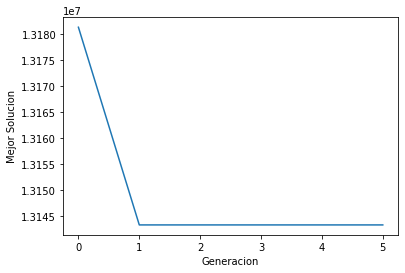

SOLUCIONES OBTENIDAS TRAS  10
12910026
12806223
13138108
12993161
13076355
12933135
13117352
13140189
13129087
13143360

MEDIA DE RESULTADOS DE  10  EJECUCIONES
13038699.6
[12910026, 12806223, 13138108, 12993161, 13076355, 12933135, 13117352, 13140189, 13129087, 13143360]


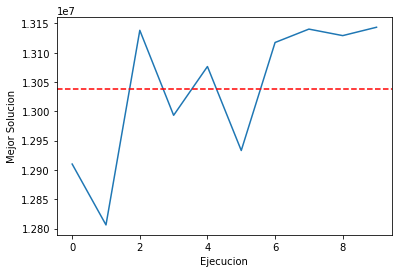

In [47]:
import random
import numpy as np


def main():
    sol_ejecuciones = []
    num_ejecuciones = 10
    for iteration in range(num_ejecuciones):
      datos = leer_datos('Knapsack-datasets/24')
      pesos = datos[0]
      precios = datos[1]
      pesoMax = datos[2] #Peso máximo que se puede poner en la mochila
      solOptima=datos[3]
      mejoresSoluciones=[]
      nSoluciones = 26 #Tamaño de la poblacion
      maxGeneraciones = 6 #Numero de generaciones
      k = 3 #Tamaño torneo selector de padres
      cProb = 0.7 #Probabilidad de cruce
      mProb = 0.1 #Probabilidad de mutacion
      suma = 0 #Variable para generar la media de las generaciones
      l=len(pesos)
      ##Creamos n soluciones aleatorias que sean válidas
      poblacion = []
      for i in range(nSoluciones):
          objetos = list(range(l))
          solucion = []
          peso = 0
          while peso < pesoMax:
              objeto = objetos[random.randint(0, len(objetos) - 1)]
              peso += pesos[objeto]
              if peso <= pesoMax:
                  solucion.append(objeto)
                  objetos.remove(objeto)

          s = []
          for i in range(l):
              s.append(0)
          for i in solucion:
              s[i] = 1
          poblacion.append([s,evaluarSolucion(s,precios,pesos,pesoMax)])

      it=0
      while it < maxGeneraciones:
          nSoluciones = aplicarOperadoresGeneticos(poblacion,k,cProb,mProb,0,0)
          #Modelo generacional
          poblacion = []
          for solucion in nSoluciones:
              poblacion.append([solucion[0],evaluarSolucion(solucion[0],precios,pesos,pesoMax)])
          it+=1
          print('SOLUCIÓN MEJOR OBTENIDA DEL ALGORITMO: ')
          poblacion.sort(key=lambda x: x[1], reverse=True) #Ordena de mayor a menor el segundo elemento de poblacion(valor)
          print(poblacion[0])
          mejoresSoluciones.append(poblacion[0][1])
          print(mejoresSoluciones)

          suma = suma + poblacion[0][1]

      print('POBLACIÓN FINAL EVALUADA')
      print(poblacion)

      print ('                    ')
      print ('                    ')
      print ('                    ')
      print('SOLUCIÓN MEJOR OBTENIDA DEL ALGORITMO: ')
      poblacion.sort(key=lambda x: x[1], reverse=True) #Ordena de mayor a menor el segundo elemento de poblacion(valor)
      print(poblacion[0])
      print('SOLUCIÓN ÓPTIMA REAL')
      print(solOptima, evaluarSolucion(solOptima, precios, pesos, pesoMax))
      sol_ejecuciones.append(poblacion[0])
      print('Media de valor de mejores soluciones obtenidas')
      print(suma/(maxGeneraciones))

      import matplotlib.pyplot as plt

      plt.plot(range(maxGeneraciones), mejoresSoluciones)
      plt.xlabel('Generacion')
      plt.ylabel('Mejor Solucion')
      plt.show()


    print('SOLUCIONES OBTENIDAS TRAS ',num_ejecuciones)
    sum_ejecuciones = 0
    mejorSol_ejecucion = []
    for solucion in sol_ejecuciones:
      print(solucion[1])
      mejorSol_ejecucion.append(solucion[1])
      sum_ejecuciones = sum_ejecuciones + solucion[1]
    
    print('\nMEDIA DE RESULTADOS DE ', num_ejecuciones, ' EJECUCIONES')
    media_ejecuciones = sum_ejecuciones / num_ejecuciones
    print(media_ejecuciones)
    print(mejorSol_ejecucion)

    plt.plot(range(num_ejecuciones), mejorSol_ejecucion)
    plt.axhline(media_ejecuciones, color='r', linestyle='--')
    plt.xlabel('Ejecucion')
    plt.ylabel('Mejor Solucion')
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    plt.show()

if __name__ == "__main__":
    main()
